# **Insights into Interview and Role Acceptance**

## **Project Objective**
Analyze and identify the key factors influencing interview and role acceptance decisions.

## **Dataset Overview**
The dataset contains 52 features capturing candidate demographics, interview performance, and outcomes. We will focus on the most relevant columns for this analysis.

## **Steps to Follow**
1. **Exploratory Data Analysis (EDA):**
   - Examine the data distribution.
   - Identify and handle missing or inconsistent data.

2. **Feature Selection:**
   - Focus on columns most relevant to the project objective.

3. **Model Development:**
   - Build a predictive model to identify significant factors affecting role acceptance.

## **Relevant Columns for Analysis**
### Candidate Demographics:
- `Age`
- `Gender`
- `Marital status`
- `Experienced candidate (Experience in months)`
- `Nature of work`
- `Last Fixed CTC (lakhs)`

### Interview Performance:
- `Fluency in English based on introduction`
- `Confidence based on Introduction (English)`
- `Confidence based on the topic given`
- `Confidence Based on the PPT Question`
- `Confidence based on the sales scenario`
- `Structured Thinking Scores`
- `Regional fluency based on the topic given`
- `Regional fluency Based on the PPT Question`
- `Mother tongue influence while speaking English`

### Job Role and Outcome:
- `Role acceptance`
- `Interview Verdict`
- `Candidate is willing to relocate`
- `Whether joined the company or not`

## **Expected Outcomes**
- Understand which factors are most important in determining interview success.
- Build a model to predict the likelihood of candidate role acceptance and joining.

## **Next Steps**
- Load the dataset and perform initial cleaning.
- Begin with EDA to explore patterns and correlations.
- Select relevant features and start feature engineering.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("interview_db.csv")
print("Shape of the dataset:", df.shape)
df.head()

Shape of the dataset: (21256, 52)


,Name,Age,Gender,Type of Graduation/Post Graduation,Marital status,Mode of interview given by candidate?,Pre Interview Check,Fluency in English based on introduction,Confidence based on Introduction (English),Confidence based on the topic given,...,Structured Thinking Based on the PPT Question.1,Structured Thinking( Call pitch).1,Regional fluency based on the topic given .1,Regional fluency Based on the PPT Question.1,Regional fluency based on the sales scenario.1,Confidence Score,Structured Thinking Score,Regional Fluency Score,Total Score,Whether joined the company or not\n
0,parida,25,Female,Masters in data science,Unmarried,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Guarded Confidence - Confident in some areas a...,...,3,2,1,1.0,1.0,11,7,3,42,No
1,shreej,29,Female,BSc or MSc,Unmarried,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,...,3,3,3,3.0,3.0,12,9,9,60,No
2,ms6744,27,Female,B.E / B-Tech,Unmarried,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the Int...,...,3,3,3,1.0,3.0,10,9,7,52,Yes
3,aswalu,22,Male,B.E / B-Tech,Unmarried,Laptop,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,...,3,3,3,3.0,3.0,12,9,9,60,Yes
4,aniket,22,Male,BA/MA,Unmarried,Mobile,Proceed with the Interview,Taking gaps while speaking due to lack of cont...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the Int...,...,2,1,3,1.0,3.0,10,5,7,44,Not Joined


In [4]:
import warnings
warnings.filterwarnings('ignore')


In [6]:
# Get summary statistics for numerical columns
df.describe()


,Confidence based on Introduction (English).1,Confidence based on the topic given .1,Confidence Based on the PPT Question.1,Confidence based on the sales scenario.1,Structured Thinking (In regional only).1,Structured Thinking Based on the PPT Question.1,Structured Thinking( Call pitch).1,Regional fluency based on the topic given .1,Regional fluency Based on the PPT Question.1,Regional fluency based on the sales scenario.1,Confidence Score,Structured Thinking Score,Regional Fluency Score,Total Score
count,21256.000000,21256.000000,21256.000000,21256.000000,21256.000000,21256.000000,21256.000000,21256.000000,18705.000000,18705.000000,21256.000000,21256.000000,21256.000000,21256.000000
mean,2.218950,2.004610,1.977418,1.916635,2.100066,2.070615,2.021594,1.808995,2.019246,1.992355,8.117614,6.192275,5.339151,39.298081
std,0.642017,0.953779,0.959131,0.969696,0.970808,0.968840,0.993488,1.124784,0.957811,0.950775,3.036529,2.716280,2.936865,16.351501
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000
25%,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,7.000000,5.000000,3.000000,32.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,8.000000,7.000000,5.000000,40.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,11.000000,8.000000,9.000000,52.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,12.000000,9.000000,9.000000,60.000000


In [8]:
print(df.columns.tolist())

['Name', 'Age', 'Gender', 'Type of Graduation/Post Graduation', 'Marital status', 'Mode of interview given by candidate?', 'Pre Interview Check', 'Fluency in English based on introduction', 'Confidence based on Introduction (English)', 'Confidence based on the topic given  ', 'Confidence Based on the PPT Question', 'Confidence based on the sales scenario', 'Structured Thinking (In regional only)', 'Structured Thinking Based on the PPT Question', 'Structured Thinking( Call pitch)', 'Regional fluency based on the topic given  ', 'Regional fluency Based on the PPT Question', 'Regional fluency based on the  sales scenario', 'Does the candidate has mother tongue influence while speaking english.', 'Has acquaintance in Company and has spoken to him/her before applying?', 'Candidate Status', 'Last Fixed CTC (lakhs) ', 'Currently Employed', 'Experienced candidate - (Experience in months)', 'Experienced Candidate (Nature of work)', 'What was the type of Role?\t', 'How many slides candidate have

In [10]:
# List of columns to drop
columns_to_drop = [
    "Name",
    "Gender",
    "Type of Graduation/Post Graduation",
    "Marital status",
    "Mode of interview given by candidate?",
    "Pre Interview Check",
    "Regional fluency based on the topic given  ",
    "Regional fluency Based on the PPT Question",
    "Regional fluency based on the  sales scenario",
    "Does the candidate has mother tongue influence while speaking english.",
    "Has acquaintance in Company and has spoken to him/her before applying?",
    "Candidate Status",
    "Last Fixed CTC (lakhs) ",
    "Experienced Candidate (Nature of work)",
    "What was the type of Role?\t",
    "How many slides candidate have submitted in PPT?",
    "Call-pitch Elements used during the call Sales Scenario",
    "But, my child's exam are going on now, so we will keep the counselling session after the exams get over.(Time: Favourable pitch: Counsellor hype)",
    "Let me discuss it with my child",
    "Sir being in education industry I know this is a marketing gimmick and at the end of the day you'll be selling the app.",
    "Role acceptance",
    "Role Location to be given to the candidate",
    "Comments",
    "RedFlags Comments in Interview",
    "Whether joined the company or not\n",
    "Confidence Based on the PPT Question",
    "Confidence based on the sales scenario",
    "Candidate is willing to relocate",
    "Confidence Based on the PPT Question.1",
    "Confidence based on the sales scenario.1",
    "Structured Thinking Based on the PPT Question.1",
    "Regional fluency Based on the PPT Question.1",
    "Regional fluency based on the  sales scenario.1",
    "Regional fluency based on the topic given  .1",
    "Regional Fluency Score",
    "Structured Thinking Based on the PPT Question",
    "Confidence Score",
    "Structured Thinking Score",
    "Total Score"
]

# Drop the columns
df = df.drop(columns=columns_to_drop)

# Display the first few rows of the cleaned dataset
df.head()


,Age,Fluency in English based on introduction,Confidence based on Introduction (English),Confidence based on the topic given,Structured Thinking (In regional only),Structured Thinking( Call pitch),Currently Employed,Experienced candidate - (Experience in months),Interview Verdict,Confidence based on Introduction (English).1,Confidence based on the topic given .1,Structured Thinking (In regional only).1,Structured Thinking( Call pitch).1
0,25,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Guarded Confidence - Confident in some areas a...,Scripted : To the point,Scripted - Product Features/Repetitive content...,No,6-11.99 Months,Reject,3,2,2,2
1,29,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,Logical and Structured : Detailed explanation,Logical and Structured - when this flow is fol...,No,Fresher(<6 months),Reject,3,3,3,3
2,27,Able to speak sentences in a clear/coherent wa...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the Int...,Logical and Structured : Detailed explanation,Logical and Structured - when this flow is fol...,Yes,Fresher(<6 months),Premium Select,2,3,3,3
3,22,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,Logical and Structured : Detailed explanation,Logical and Structured - when this flow is fol...,No,Fresher(<6 months),Premium Select,3,3,3,3
4,22,Taking gaps while speaking due to lack of cont...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the Int...,Scripted : To the point,Incomplete,No,Fresher(<6 months),Borderline Select,2,3,2,1


In [12]:
df.isnull().sum()

Age                                                  0
Fluency in English based on introduction             0
Confidence based on Introduction (English)           0
Confidence based on the topic given               2547
Structured Thinking (In regional only)            2547
Structured Thinking( Call pitch)                  2551
Currently Employed                                2547
Experienced candidate - (Experience in months)    2547
Interview Verdict                                 2552
Confidence based on Introduction (English).1         0
Confidence based on the topic given  .1              0
Structured Thinking (In regional only).1             0
Structured Thinking( Call pitch).1                   0
dtype: int64

### Handling Missing Values

Upon analyzing the dataset, we identified several columns with null values. Below is a summary:

| Column Name                                      | Null Count |
|--------------------------------------------------|------------|
| Confidence based on the topic given             | 2547       |
| Structured Thinking (In regional only)          | 2547       |
| Structured Thinking (Call pitch)                | 2551       |
| Currently Employed                               | 2547       |
| Experienced candidate - (Experience in months)  | 2547       |
| Interview Verdict                                | 2552       |

**Next Steps**:
- For columns with a high number of missing values (e.g., `Interview Verdict` and `Structured Thinking (Call pitch)`), decide whether to drop them or impute based on the context and requirements of the analysis.
- Numerical columns can be imputed using the mean, median, or a specific value.
- Categorical columns can be filled with the mode, a placeholder (e.g., "Unknown"), or dropped if not critical.

The next step will involve implementing these fixes systematically.


In [14]:
missing_data_df = df[df.isnull().any(axis=1)]
missing_data_df

,Age,Fluency in English based on introduction,Confidence based on Introduction (English),Confidence based on the topic given,Structured Thinking (In regional only),Structured Thinking( Call pitch),Currently Employed,Experienced candidate - (Experience in months),Interview Verdict,Confidence based on Introduction (English).1,Confidence based on the topic given .1,Structured Thinking (In regional only).1,Structured Thinking( Call pitch).1
125,22,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,NaN,NaN,NaN,NaN,NaN,NaN,3,0,0,0
146,25,Taking gaps while speaking due to lack of cont...,Nervous,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0
183,28,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,NaN,NaN,NaN,NaN,NaN,NaN,3,0,0,0
208,23,Taking gaps while speaking due to lack of cont...,Guarded Confidence - Confident in some areas a...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0,0
212,21,Taking gaps while speaking due to lack of cont...,Guarded Confidence - Confident in some areas a...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21199,22,Trying but Not Able to speak clearly & Fumbles...,Nervous,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0
21240,22,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,NaN,NaN,NaN,NaN,NaN,NaN,3,0,0,0
21249,30,Taking gaps while speaking due to lack of cont...,Guarded Confidence - Confident in some areas a...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0,0
21250,22,Able to speak sentences in a clear/coherent wa...,Guarded Confidence - Confident in some areas a...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0,0


### Handling Missing Data

After inspecting the rows with missing values, it was determined that they cannot be reasonably imputed or fixed. Therefore, we will proceed to drop all rows containing missing values to ensure the integrity of the analysis.


In [16]:
df_cleaned = df.dropna()
df = df_cleaned
df.shape


(18703, 13)

In [18]:
df.isnull().sum()

Age                                               0
Fluency in English based on introduction          0
Confidence based on Introduction (English)        0
Confidence based on the topic given               0
Structured Thinking (In regional only)            0
Structured Thinking( Call pitch)                  0
Currently Employed                                0
Experienced candidate - (Experience in months)    0
Interview Verdict                                 0
Confidence based on Introduction (English).1      0
Confidence based on the topic given  .1           0
Structured Thinking (In regional only).1          0
Structured Thinking( Call pitch).1                0
dtype: int64

In [20]:
# Check unique values in the Interview Verdict column
print(df['Interview Verdict'].unique())

['Reject' 'Premium Select' 'Borderline Select' 'Select'
 'Borderline Reject']


In [22]:
# Encode Interview Verdict column
interview_verdict_mapping = {
    'Reject':0,
    'Borderline Reject':0,
    'Select': 1,
    'Borderline Select': 1,
    'Premium Select': 1
}

df['Interview Verdict.1'] = df['Interview Verdict'].map(interview_verdict_mapping).astype(int)

In [24]:
df.head(5)

,Age,Fluency in English based on introduction,Confidence based on Introduction (English),Confidence based on the topic given,Structured Thinking (In regional only),Structured Thinking( Call pitch),Currently Employed,Experienced candidate - (Experience in months),Interview Verdict,Confidence based on Introduction (English).1,Confidence based on the topic given .1,Structured Thinking (In regional only).1,Structured Thinking( Call pitch).1,Interview Verdict.1
0,25,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Guarded Confidence - Confident in some areas a...,Scripted : To the point,Scripted - Product Features/Repetitive content...,No,6-11.99 Months,Reject,3,2,2,2,0
1,29,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,Logical and Structured : Detailed explanation,Logical and Structured - when this flow is fol...,No,Fresher(<6 months),Reject,3,3,3,3,0
2,27,Able to speak sentences in a clear/coherent wa...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the Int...,Logical and Structured : Detailed explanation,Logical and Structured - when this flow is fol...,Yes,Fresher(<6 months),Premium Select,2,3,3,3,1
3,22,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,Logical and Structured : Detailed explanation,Logical and Structured - when this flow is fol...,No,Fresher(<6 months),Premium Select,3,3,3,3,1
4,22,Taking gaps while speaking due to lack of cont...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the Int...,Scripted : To the point,Incomplete,No,Fresher(<6 months),Borderline Select,2,3,2,1,1


In [26]:
df['Currently Employed.1'] = df['Currently Employed'].map({'Yes': 1, 'No': 0})

In [28]:
df['Experienced candidate - (Experience in months)'].unique()

array(['6-11.99 Months', 'Fresher(<6 months)', '12-17.99 Months',
       '48+ Months', '24-29.99 Months', '18-23.99 Months',
       '36-47.99 Months', '30-35.99 Months'], dtype=object)

In [30]:
# Define the mapping
experience_mapping = {
    'Fresher(<6 months)': 1,
    '6-11.99 Months': 2,
    '12-17.99 Months': 3,
    '18-23.99 Months': 4,
    '24-29.99 Months': 5,
    '30-35.99 Months': 6,
    '36-47.99 Months': 7,
    '48+ Months': 8
}

# Apply the mapping to the 'Experienced candidate - (Experience in months)' column
df['Experienced candidate - (Experience in months).1'] = df['Experienced candidate - (Experience in months)'].map(experience_mapping)

# Verify the mapping
print(df['Experienced candidate - (Experience in months).1'].unique())


[2 1 3 8 5 4 7 6]


In [32]:
df.head(5)

,Age,Fluency in English based on introduction,Confidence based on Introduction (English),Confidence based on the topic given,Structured Thinking (In regional only),Structured Thinking( Call pitch),Currently Employed,Experienced candidate - (Experience in months),Interview Verdict,Confidence based on Introduction (English).1,Confidence based on the topic given .1,Structured Thinking (In regional only).1,Structured Thinking( Call pitch).1,Interview Verdict.1,Currently Employed.1,Experienced candidate - (Experience in months).1
0,25,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Guarded Confidence - Confident in some areas a...,Scripted : To the point,Scripted - Product Features/Repetitive content...,No,6-11.99 Months,Reject,3,2,2,2,0,0,2
1,29,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,Logical and Structured : Detailed explanation,Logical and Structured - when this flow is fol...,No,Fresher(<6 months),Reject,3,3,3,3,0,0,1
2,27,Able to speak sentences in a clear/coherent wa...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the Int...,Logical and Structured : Detailed explanation,Logical and Structured - when this flow is fol...,Yes,Fresher(<6 months),Premium Select,2,3,3,3,1,1,1
3,22,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,Logical and Structured : Detailed explanation,Logical and Structured - when this flow is fol...,No,Fresher(<6 months),Premium Select,3,3,3,3,1,0,1
4,22,Taking gaps while speaking due to lack of cont...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the Int...,Scripted : To the point,Incomplete,No,Fresher(<6 months),Borderline Select,2,3,2,1,1,0,1


In [34]:
# Check unique values in 'Fluency in English based on introduction' column
df['Fluency in English based on introduction'].unique()

array(['Able to speak sentences in a clear/coherent way. Smooth talker with one or two hiccups.',
       'Taking gaps while speaking due to lack of content but does not stammer or stutter',
       'Trying but Not Able to speak clearly & Fumbles a lot',
       'Natural Stutter and Stammer'], dtype=object)

In [36]:
# Map values for 'Fluency in English based on introduction' column
fluency_map = {
    'Able to speak sentences in a clear/coherent way. Smooth talker with one or two hiccups.': 4,
    'Taking gaps while speaking due to lack of content but does not stammer or stutter': 3,
    'Trying but Not Able to speak clearly & Fumbles a lot': 2,
    'Natural Stutter and Stammer': 1
}

# Apply the mapping
df['Fluency in English based on introduction.1'] = df['Fluency in English based on introduction'].map(fluency_map)
df['Fluency in English based on introduction.1'].unique()

array([4, 3, 2, 1], dtype=int64)

In [38]:
df.head()

,Age,Fluency in English based on introduction,Confidence based on Introduction (English),Confidence based on the topic given,Structured Thinking (In regional only),Structured Thinking( Call pitch),Currently Employed,Experienced candidate - (Experience in months),Interview Verdict,Confidence based on Introduction (English).1,Confidence based on the topic given .1,Structured Thinking (In regional only).1,Structured Thinking( Call pitch).1,Interview Verdict.1,Currently Employed.1,Experienced candidate - (Experience in months).1,Fluency in English based on introduction.1
0,25,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Guarded Confidence - Confident in some areas a...,Scripted : To the point,Scripted - Product Features/Repetitive content...,No,6-11.99 Months,Reject,3,2,2,2,0,0,2,4
1,29,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,Logical and Structured : Detailed explanation,Logical and Structured - when this flow is fol...,No,Fresher(<6 months),Reject,3,3,3,3,0,0,1,4
2,27,Able to speak sentences in a clear/coherent wa...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the Int...,Logical and Structured : Detailed explanation,Logical and Structured - when this flow is fol...,Yes,Fresher(<6 months),Premium Select,2,3,3,3,1,1,1,4
3,22,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,Logical and Structured : Detailed explanation,Logical and Structured - when this flow is fol...,No,Fresher(<6 months),Premium Select,3,3,3,3,1,0,1,4
4,22,Taking gaps while speaking due to lack of cont...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the Int...,Scripted : To the point,Incomplete,No,Fresher(<6 months),Borderline Select,2,3,2,1,1,0,1,3


## Distribution of Interview Verdicts

In this section, we'll visualize the distribution of the **Interview Verdicts** column. This will help us understand the frequency of each interview outcome, including:
- **Select**
- **Reject**

Let's create a bar plot to see the distribution of these verdicts in the dataset.


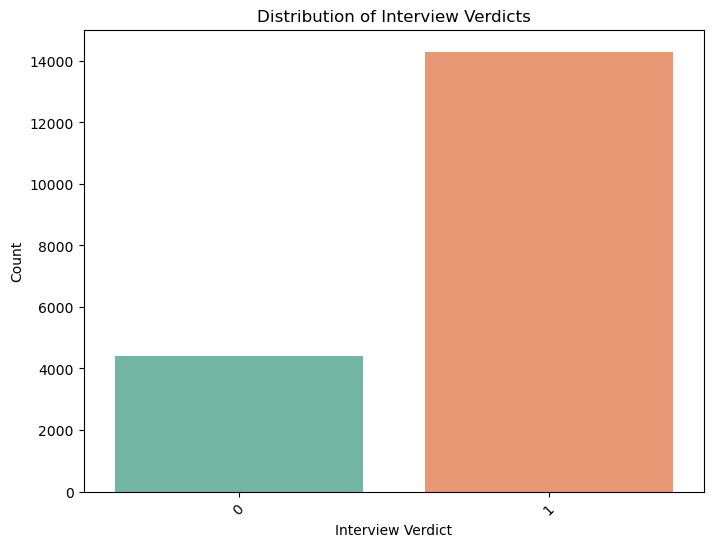

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for the distribution of Interview Verdicts
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Interview Verdict.1', palette='Set2')
plt.title('Distribution of Interview Verdicts')
plt.xlabel('Interview Verdict')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## Experience vs Interview Verdict

Now, we'll visualize how **Experience (in months)** impacts the **Interview Verdict**. By using a box plot, we can see how the different levels of experience correspond to the interview outcomes. This can help us understand if more experienced candidates are more likely to receive certain verdicts.


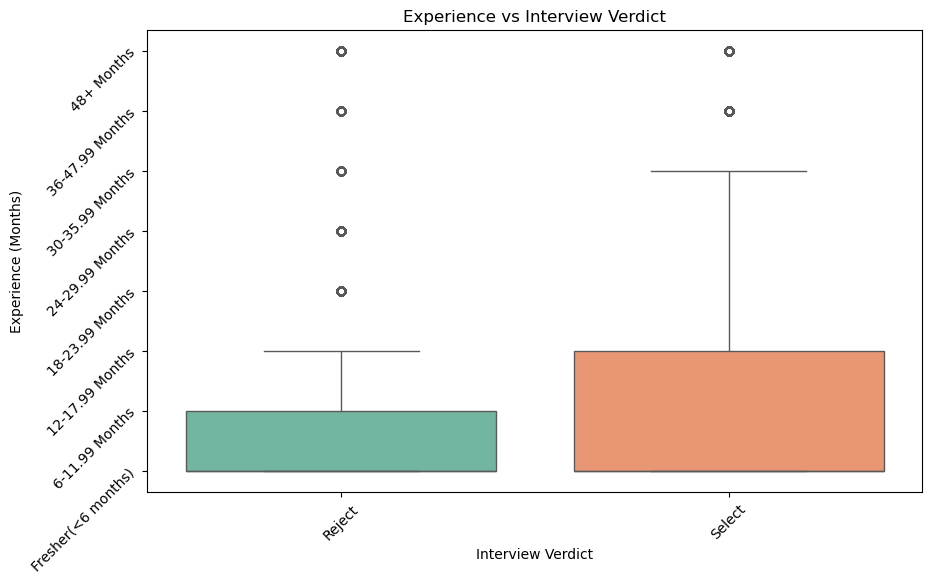

In [52]:
experience_mapping = {
    1: 'Fresher(<6 months)',
    2: '6-11.99 Months',
    3: '12-17.99 Months',
    4: '18-23.99 Months',
    5: '24-29.99 Months',
    6: '30-35.99 Months',
    7: '36-47.99 Months',
    8: '48+ Months'
}
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Interview Verdict.1', y='Experienced candidate - (Experience in months).1', palette='Set2')
plt.title('Experience vs Interview Verdict')
plt.xlabel('Interview Verdict')
plt.ylabel('Experience (Months)')
plt.xticks(rotation=45,ticks=range(0,2),labels=["Reject","Select"])
plt.yticks(ticks=range(1, 9), labels=list(experience_mapping.values()), rotation=45)
plt.show()


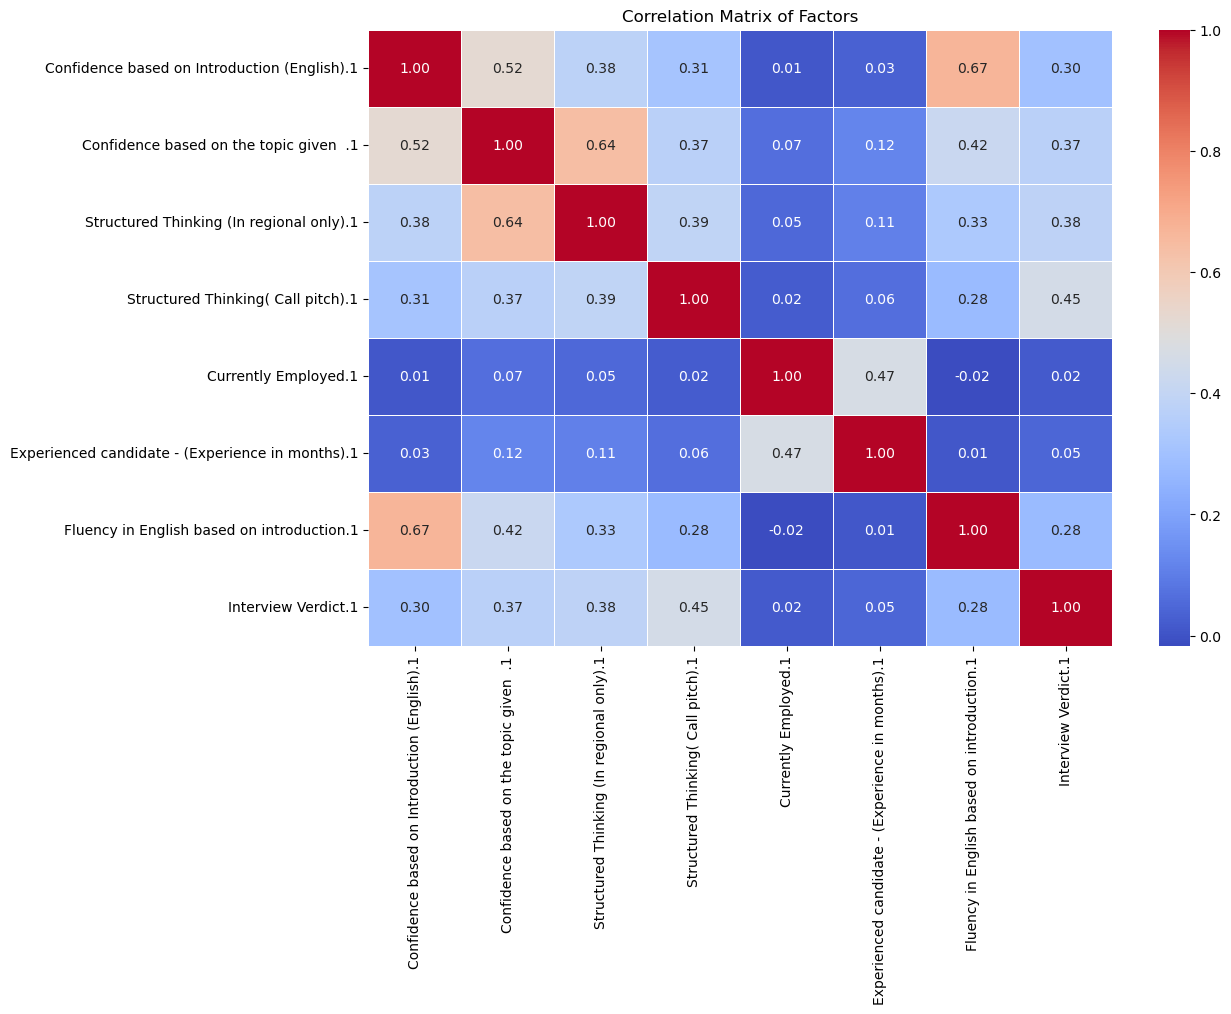

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation and explicitly include 'Interview Verdict.1'
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Check if 'Interview Verdict.1' is already in the numeric columns, and include it if not
if 'Interview Verdict.1' not in numeric_cols:
    numeric_cols = list(numeric_cols) + ['Interview Verdict.1']

# Calculate the correlation matrix for the numeric columns
correlation_matrix = df[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Factors')
plt.show()

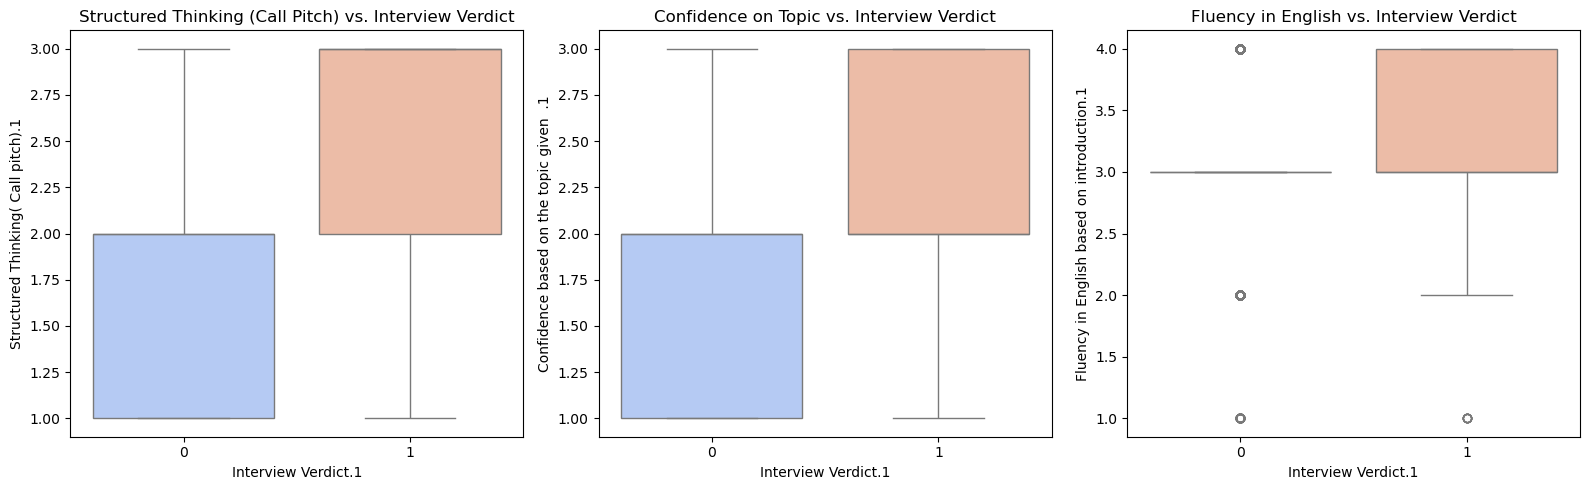

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(16, 5))

# Structured Thinking (Call Pitch)
plt.subplot(1, 3, 1)
sns.boxplot(x=df['Interview Verdict.1'], y=df['Structured Thinking( Call pitch).1'], palette='coolwarm')
plt.title('Structured Thinking (Call Pitch) vs. Interview Verdict')

# Confidence Based on Topic
plt.subplot(1, 3, 2)
sns.boxplot(x=df['Interview Verdict.1'], y=df['Confidence based on the topic given  .1'], palette='coolwarm')
plt.title('Confidence on Topic vs. Interview Verdict')

# Fluency in English
plt.subplot(1, 3, 3)
sns.boxplot(x=df['Interview Verdict.1'], y=df['Fluency in English based on introduction.1'], palette='coolwarm')
plt.title('Fluency in English vs. Interview Verdict')

plt.tight_layout()
plt.show()


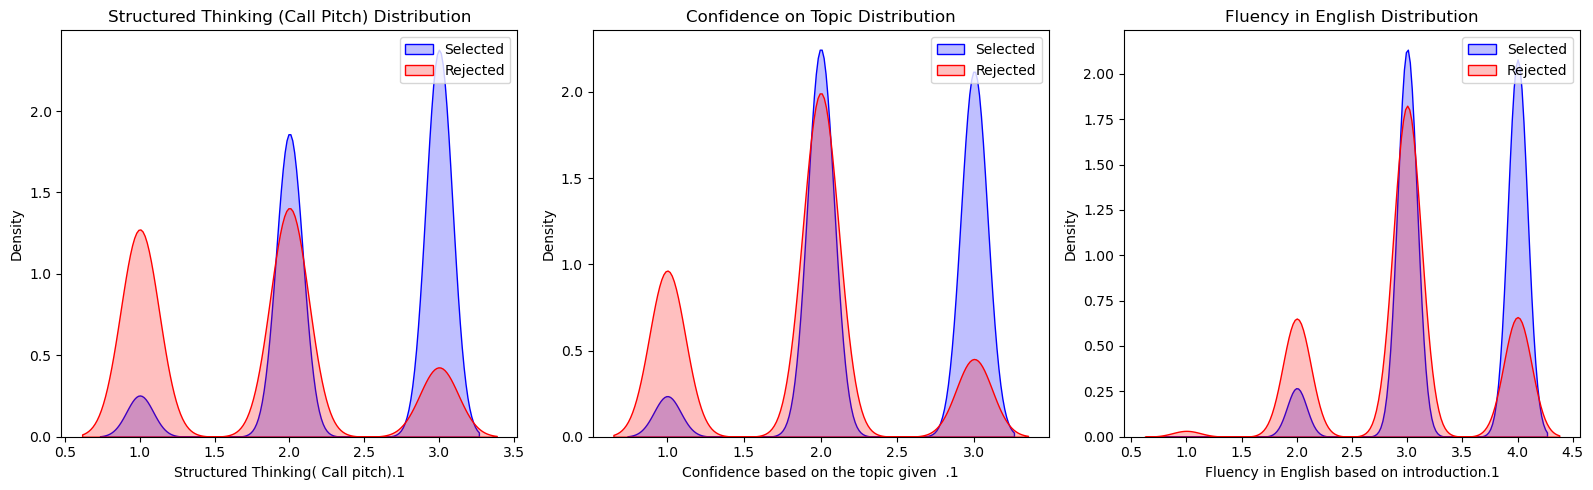

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(16, 5))

# Structured Thinking (Call Pitch)
plt.subplot(1, 3, 1)
sns.kdeplot(df[df['Interview Verdict.1'] == 1]['Structured Thinking( Call pitch).1'], label='Selected', shade=True, color='blue')
sns.kdeplot(df[df['Interview Verdict.1'] == 0]['Structured Thinking( Call pitch).1'], label='Rejected', shade=True, color='red')
plt.title('Structured Thinking (Call Pitch) Distribution')
plt.legend()

# Confidence Based on Topic
plt.subplot(1, 3, 2)
sns.kdeplot(df[df['Interview Verdict.1'] == 1]['Confidence based on the topic given  .1'], label='Selected', shade=True, color='blue')
sns.kdeplot(df[df['Interview Verdict.1'] == 0]['Confidence based on the topic given  .1'], label='Rejected', shade=True, color='red')
plt.title('Confidence on Topic Distribution')
plt.legend()

# Fluency in English
plt.subplot(1, 3, 3)
sns.kdeplot(df[df['Interview Verdict.1'] == 1]['Fluency in English based on introduction.1'], label='Selected', shade=True, color='blue')
sns.kdeplot(df[df['Interview Verdict.1'] == 0]['Fluency in English based on introduction.1'], label='Rejected', shade=True, color='red')
plt.title('Fluency in English Distribution')
plt.legend()

plt.tight_layout()
plt.show()

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Select numerical columns as features
features = [
    'Confidence based on Introduction (English).1',
    'Confidence based on the topic given  .1',
    'Structured Thinking (In regional only).1',
    'Structured Thinking( Call pitch).1',
    'Currently Employed.1',
    'Experienced candidate - (Experience in months).1',
    'Fluency in English based on introduction.1'
]

# Define X (features) and y (target)
X = df[features]
y = df['Interview Verdict.1']  # 0 = Rejected, 1 = Selected

# Split data into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))


Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.72      0.46      0.56       881
           1       0.85      0.94      0.90      2860

    accuracy                           0.83      3741
   macro avg       0.79      0.70      0.73      3741
weighted avg       0.82      0.83      0.82      3741



In [68]:
# Get feature importance (coefficients)
import numpy as np

feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': np.abs(model.coef_[0])  # Take absolute values for importance
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)


                                            Feature  Coefficient
3                Structured Thinking( Call pitch).1     1.311591
2          Structured Thinking (In regional only).1     0.719073
1           Confidence based on the topic given  .1     0.493544
6        Fluency in English based on introduction.1     0.298647
0      Confidence based on Introduction (English).1     0.258295
4                              Currently Employed.1     0.064359
5  Experienced candidate - (Experience in months).1     0.004428


## **📊 Model Performance: How Well Can We Predict Selection?**
- **Accuracy:** **83%**  
- **Precision & Recall:**  
  - **Selected Candidates (1)** → Well predicted (Precision: 0.85, Recall: 0.94).  
  - **Rejected Candidates (0)** → Harder to predict (Precision: 0.72, Recall: 0.46).  


# **📌 What We Learned from Interview Data Analysis**

We analyzed interview evaluation data and built a Logistic Regression model to see which factors influence selection the most. Here’s what we found:  

## **🚀 The Most Important Factors for Selection**
### **1️⃣ Structured Thinking is the Game-Changer**
- **Structured Thinking in Call Pitch** is **THE MOST IMPORTANT factor** (Coefficient: **1.31**).  
- **Structured Thinking in Regional Language** is also very influential (Coefficient: **0.72**).  
- Candidates who give **logical, well-structured answers** have a **much higher chance of selection**.  

**🛠 What to do?**
- Organize your thoughts before answering.  
- Avoid robotic or repetitive responses.  
- Use structured methods like **STAR (Situation, Task, Action, Result)**.  

### **2️⃣ Confidence on a Given Topic Matters**
- Higher confidence on the given topic (Coefficient: **0.49**) leads to better results.  
- Confidence in introduction matters too (Coefficient: **0.26**), but not as much as topic confidence.  
- Nervous candidates (low confidence) face more rejections.  

**🛠 What to do?**
- Practice mock interviews.  
- Control your body language.  
- Speak clearly and with purpose.  

### **3️⃣ Fluency in English Helps, but Not as Much as Thought**
- Candidates with **smooth and coherent speech (Coefficient: 0.29)** have a better selection rate.  
- However, **fluency is not as impactful as structured thinking or confidence**.  

**🛠 What to do?**
- Speak in English daily.  
- Record yourself and review.  
- Use tools like **Grammarly, TED Talks, or Duolingo**.  

## **❌ What Doesn’t Matter Much?**
### **Work Experience & Employment Status**
- **Currently Employed?** → Barely matters (Coefficient: **0.06**).  
- **More experience (in months)?** → Almost irrelevant! (Coefficient: **0.004**).  
- Even freshers **have a fair chance** if they **perform well in communication, confidence, and structured thinking**.  

**🛠 What to do?**
- If you’re a fresher, **focus on communication and structured thinking**.  
- Don’t stress about work experience—**presentation matters more!**  

### **🧐 Key Takeaways**
✅ **Structure your responses properly**—this is the #1 factor.  
✅ **Speak with confidence**, especially on a given topic.  
✅ **Fluency helps, but it’s not everything**.  
✅ **Work experience isn’t a big deal—presentation matters more!**  

By working on these areas, you’ll **increase your chances of selection significantly**.  
